## Key Requirements for the iRF scikit-learn implementation

* The following is a documentation of the main requirements for the iRF implementation

## Typical Setup


### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
import numpy as np
from functools import reduce

# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/Users/shamindras/PERSONAL/LEARNING/REPOS/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

## Wrapper function

## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [57]:
load_breast_cancer = load_breast_cancer()

In [58]:
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(n_estimators=10, 
                                                                             feature_weight=None)

## Check out the data

In [59]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 5 rows of the training set features", X_train[:2], sep = ":\n")
print("\n")
print("first 5 rows of the training set outcomes", y_train[:2], sep = ":\n")

Training feature dimensions:
(512, 30)


Training outcome dimensions:
(512,)


Test feature dimensions:
(57, 30)


Test outcome dimensions:
(57,)


first 5 rows of the training set features:
[[  1.98900000e+01   2.02600000e+01   1.30500000e+02   1.21400000e+03
    1.03700000e-01   1.31000000e-01   1.41100000e-01   9.43100000e-02
    1.80200000e-01   6.18800000e-02   5.07900000e-01   8.73700000e-01
    3.65400000e+00   5.97000000e+01   5.08900000e-03   2.30300000e-02
    3.05200000e-02   1.17800000e-02   1.05700000e-02   3.39100000e-03
    2.37300000e+01   2.52300000e+01   1.60500000e+02   1.64600000e+03
    1.41700000e-01   3.30900000e-01   4.18500000e-01   1.61300000e-01
    2.54900000e-01   9.13600000e-02]
 [  2.01800000e+01   1.95400000e+01   1.33800000e+02   1.25000000e+03
    1.13300000e-01   1.48900000e-01   2.13300000e-01   1.25900000e-01
    1.72400000e-01   6.05300000e-02   4.33100000e-01   1.00100000e+00
    3.00800000e+00   5.24900000e+01   9.08700000e-03   2.71500000e-02
  

## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for RIT purposes

In [60]:
all_rf_tree_data = irf_utils.get_rf_tree_data(rf=rf,
                                              X_train=X_train, y_train=y_train, 
                                              X_test=X_test, y_test=y_test)

In [61]:
all_rf_tree_data

{'dtree0': {'all_leaf_node_classes': [1,
   0,
   1,
   0,
   1,
   0,
   1,
   1,
   0,
   1,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   0,
   0],
  'all_leaf_node_paths': [array([0, 1, 2, 3, 4, 5, 6]),
   array([0, 1, 2, 3, 4, 5, 7, 8]),
   array([0, 1, 2, 3, 4, 5, 7, 9]),
   array([ 0,  1,  2,  3,  4, 10]),
   array([ 0,  1,  2,  3, 11, 12]),
   array([ 0,  1,  2,  3, 11, 13, 14]),
   array([ 0,  1,  2,  3, 11, 13, 15]),
   array([ 0,  1,  2, 16, 17, 18, 19]),
   array([ 0,  1,  2, 16, 17, 18, 20, 21, 22]),
   array([ 0,  1,  2, 16, 17, 18, 20, 21, 23]),
   array([ 0,  1,  2, 16, 17, 18, 20, 24]),
   array([ 0,  1,  2, 16, 17, 25]),
   array([ 0,  1,  2, 16, 26]),
   array([ 0,  1, 27, 28, 29]),
   array([ 0,  1, 27, 28, 30]),
   array([ 0,  1, 27, 31, 32]),
   array([ 0,  1, 27, 31, 33, 34]),
   array([ 0,  1, 27, 31, 33, 35, 36]),
   array([ 0,  1, 27, 31, 33, 35, 37]),
   array([ 0, 38, 39, 40]),
   array([ 0, 38, 39, 41]),
   array([ 0, 38, 42])],
  'all_leaf

## STEP 3: Get the RIT data and produce RITs

In [62]:
all_rit_tree_data = irf_utils.get_rit_tree_data(
    all_rf_tree_data=all_rf_tree_data,
    bin_class_type=1,
    random_state=12,
    M=100,
    max_depth=2,
    noisy_split=False,
    num_splits=2)

In [63]:
for i in range(100):
    print(all_rit_tree_data['rit{}'.format(i)]['rit_leaf_node_union_value'])

[24]
[23]
[ 6  9 10 20 27]
[20]
[ 6 20 27]
[ 7 23 28]
[ 1  6 13 22 23 24]
[]
[7]
[6]
[]
[ 6  9 10 20 22 27 29]
[ 1  6 13]
[6]
[ 6 10 20 27]
[ 1  6 13 20]
[ 1  6 13]
[ 1  6 13 22 23]
[ 1  7 23 28]
[23]
[]
[ 7 28]
[23]
[ 1  3  7  8 17 20 22]
[13 20]
[6]
[1]
[ 6 20 27]
[ 1  3  7  8 17 20 22]
[ 0  7 26]
[ 6  9 10 20 22 27 29]
[ 6 20]
[ 6  9 10 20 27]
[7]
[7]
[ 6 26]
[0]
[7]
[ 1 20]
[0]
[ 6 24 27]
[]
[20]
[ 1  3  7  8 17 20 22]
[ 0  7 26]
[ 1  5  6 13 23 26]
[26 27]
[ 6 20 27]
[ 7 26]
[ 7 23]
[ 1  3  7  8 17 20 22]
[ 1 22 23]
[ 0  7 26]
[7]
[ 1  6 13 23]
[ 6 10 20 22 27]
[ 7 13]
[23 26]
[ 5  6  9 10 20 22 27 29]
[]
[ 6 20 27]
[ 6 22 24]
[]
[ 1  7 22]
[ 7 20]
[ 6 20]
[6]
[ 5  6 10 20 27]
[ 1 22 23]
[ 7 23 28]
[ 7 23 28]
[20 24 27]
[7]
[ 7 23 28]
[1 7]
[ 6 22 23 24]
[ 7 20]
[23 26]
[10 20 27]
[ 1  6 13]
[ 0  7 26]
[ 0 10 20 24 27]
[ 6 20]
[ 6 20 27]
[ 7 20]
[13]
[13 23]
[0]
[6]
[ 1  6 13 22 23 24]
[7]
[ 7 13]
[ 1  3  7  8 17 20 22]
[ 6 10 20 27]
[]
[ 1  6 13 20]
[6]
[ 7 26]
[20]
[ 6 20 27]


# Perform Manual CHECKS on the `irf_utils`
* These should be converted to unit tests and checked with `nosetests -v test_irf_utils.py`

# Step 4: Plot some Data

### List Ranked Feature Importances

In [49]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_tree_data['feature_importances_rank_idx']
feature_importances = all_rf_tree_data['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 22 (0.151955)
2. feature 20 (0.143020)
3. feature 23 (0.142590)
4. feature 27 (0.100643)
5. feature 6 (0.078505)
6. feature 7 (0.075829)
7. feature 0 (0.041839)
8. feature 2 (0.032580)
9. feature 3 (0.031513)
10. feature 26 (0.028690)
11. feature 25 (0.021367)
12. feature 21 (0.020998)
13. feature 13 (0.017793)
14. feature 24 (0.013841)
15. feature 5 (0.011701)
16. feature 12 (0.011623)
17. feature 28 (0.011228)
18. feature 1 (0.010321)
19. feature 29 (0.007189)
20. feature 17 (0.006737)
21. feature 10 (0.004828)
22. feature 4 (0.004799)
23. feature 15 (0.004465)
24. feature 19 (0.004438)
25. feature 14 (0.004197)
26. feature 16 (0.004128)
27. feature 9 (0.003775)
28. feature 11 (0.003623)
29. feature 8 (0.002909)
30. feature 18 (0.002876)


### Plot Ranked Feature Importances

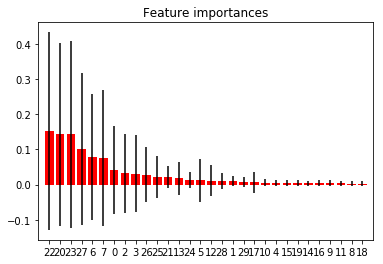

In [16]:
# Plot the feature importances of the forest
feature_importances_std = all_rf_tree_data['feature_importances_std']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

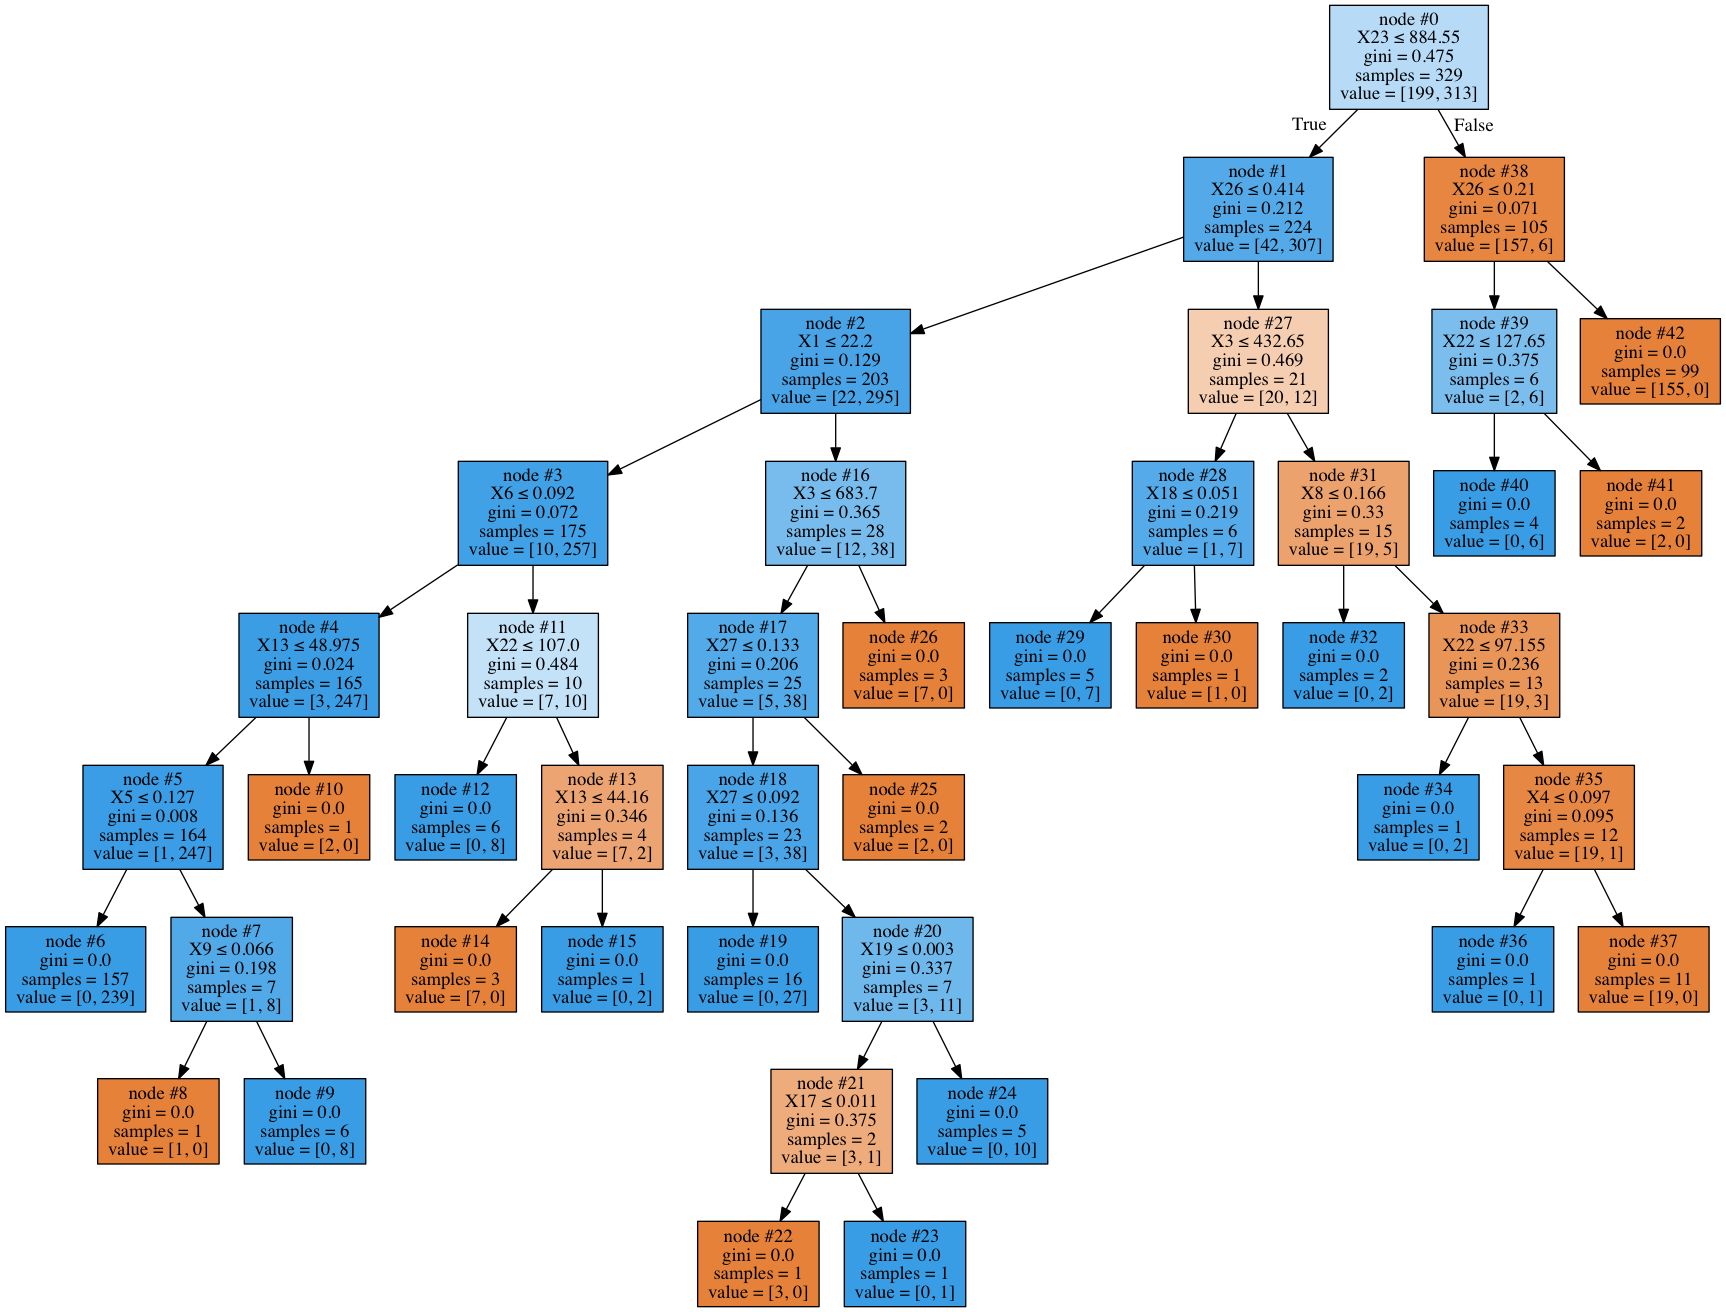

In [17]:
# Now plot the trees individually
irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

## Compare to our dict of extracted data from the tree

In [18]:
irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0'])

{   'all_leaf_node_classes': [   1,
                                 0,
                                 1,
                                 0,
                                 1,
                                 0,
                                 1,
                                 1,
                                 0,
                                 1,
                                 1,
                                 0,
                                 0,
                                 1,
                                 0,
                                 1,
                                 1,
                                 1,
                                 0,
                                 1,
                                 0,
                                 0],
    'all_leaf_node_paths': [   array([0, 1, 2, 3, 4, 5, 6]),
                               array([0, 1, 2, 3, 4, 5, 7, 8]),
                               array([0, 1, 2, 3, 4, 5, 7, 9]),
                  

In [19]:
# Count the number of samples passing through the leaf nodes
sum(all_rf_tree_data['dtree0']['tot_leaf_node_values'])

512

### Check output against the diagram

In [20]:
irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0']['all_leaf_paths_features'])

[   array([23, 26,  1,  6, 13,  5]),
    array([23, 26,  1,  6, 13,  5,  9]),
    array([23, 26,  1,  6, 13,  5,  9]),
    array([23, 26,  1,  6, 13]),
    array([23, 26,  1,  6, 22]),
    array([23, 26,  1,  6, 22, 13]),
    array([23, 26,  1,  6, 22, 13]),
    array([23, 26,  1,  3, 27, 27]),
    array([23, 26,  1,  3, 27, 27, 19, 17]),
    array([23, 26,  1,  3, 27, 27, 19, 17]),
    array([23, 26,  1,  3, 27, 27, 19]),
    array([23, 26,  1,  3, 27]),
    array([23, 26,  1,  3]),
    array([23, 26,  3, 18]),
    array([23, 26,  3, 18]),
    array([23, 26,  3,  8]),
    array([23, 26,  3,  8, 22]),
    array([23, 26,  3,  8, 22,  4]),
    array([23, 26,  3,  8, 22,  4]),
    array([23, 26, 22]),
    array([23, 26, 22]),
    array([23, 26])]


In [81]:
from sklearn.utils import resample

def run_RIT(X_train,
            X_test,
            y_train,
            y_test,
            K,
            n_estimators,
            random_state_classifier=2017,
            B,
            propn_n_samples=0.2):
    """ This function will allow us to run the RIT
        for the given parameters
    """

    # Set the random state for reproducibility
    np.random.seed(random_state_classifier)
    
    # Initialize dictionary of rf weights
    all_rf_weights = {}
    
    # Initialize dictionary of rf bootstrap outputs
    all_rf_bootstrap = {}

    for k in range(K):
        if k == 0:

            # Initially feature weights are None
            feature_importances = None

            # Update the dictionary of all our RF weights
            all_rf_weights["rf_weight{}".format(k)] = feature_importances

            # fit RF feature weights i.e. initially None
            rf = RandomForestClassifier(
                n_estimators=n_estimators,
                random_state=random_state_classifier,
                feature_weights=all_rf_weights["rf_weight{}".format(k)])

            # fit the classifier
            rf.fit(X=X_train, y=y_train)

            # Update feature weights using the 
            # new feature importance score
            feature_importances = rf.feature_importances_

            # Load the weights for the next iteration            
            all_rf_weights["rf_weight{}".format(k + 1)] = feature_importances

        else:
            # fit weighted RF
            # Use the weights from the previous iteration
            rf = RandomForestClassifier(
                n_estimators=n_estimators,
                random_state=random_state_classifier,
                feature_weights=all_rf_weights["rf_weight{}".format(k)])

            # fit the classifier
            rf.fit(X=X_train, y=y_train)

            # Update feature weights using the 
            # new feature importance score
            feature_importances = rf.feature_importances_

            # Load the weights for the next iteration            
            all_rf_weights["rf_weight{}".format(k + 1)] = feature_importances

            # store results here

            # CHECK: Set the seed up here
            # Can we just set this in one place?

    for b in range(B):

        # Convert the bootstrap resampling proportion to the number
        # of rows to resample from the training data        
        n_samples = ceil(propn_n_samples * X_train.shape[0])

        # resample with proportion from the training data
        # Resample rows using proportion rather than
        X_train_rsmpl, y_rsmpl = resample(
            X_train, y_train, n_samples=n_samples)

        # Set up the weighted random forest
        # Using the weight from the (K-1)th iteration i.e. RF(w(K))
        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=random_state_classifier,
            feature_weights=all_rf_weights["rf_weight{}".format(K - 1)])

        # Fit RF(w(K)) on the bootstrapped dataset
        rf.fit(X=X_train_rsmpl, y=y_rsmpl)

        # All RF tree data
        # CHECK: why do we need y_train here?
        all_rf_tree_data = irf_utils.get_rf_tree_data(
            rf=rf,
            X_train=X_train_rsmpl,
            y_train=y_rsmpl,
            X_test=X_test,
            y_test=y_test)

        # Run RIT on the interaction rule set
        # CHECK - each of these variables needs to be passed into
        # the 
        all_rit_tree_data = irf_utils.get_rit_tree_data(
            all_rf_tree_data=all_rf_tree_data,
            bin_class_type=1,
            random_state=12,
            M=10,
            max_depth=3,
            noisy_split=False,
            num_splits=2)

        # return RIT results

    # Stability Score 

    return all_rf_weights

SyntaxError: non-default argument follows default argument (<ipython-input-81-ef60808fed5f>, line 3)

In [68]:
from sklearn.utils import resample
from math import ceil
np.random.seed(100)
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(n_estimators=10)
X_train.shape

(512, 30)

In [78]:
propn_n_samples = 0.2
n_samples = ceil(propn_n_samples * X_train.shape[0])
n_samples

103

In [79]:
X_train_rsmpl, y_train_rsmpl = resample(X_train, y_train, n_samples=n_samples)

In [71]:
X_train_rsmpl.shape

(103, 30)

In [72]:
y_train_rsmpl.shape

(103,)

In [73]:
sum(X_train_rsmpl[1])

1091.9835849999999

In [74]:
X_train_rsmpl, y_train_rsmpl = resample(X_train, y_train, n_samples=propn_n_samples)

In [75]:
sum(X_train_rsmpl[1])

1237.0636870000001

In [76]:
X_train_rsmpl, y_train_rsmpl = resample(X_train, y_train, n_samples=propn_n_samples)

In [85]:
sum(X_train_rsmpl[1])

1044.7086870000001

In [70]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from math import ceil


def run_RIT(X_train,
            X_test,
            y_train,
            y_test,
            K,
            n_estimators,
            B,
            random_state_classifier=2017,
            propn_n_samples=0.2):
    """ This function will allow us to run the RIT
        for the given parameters
    """

    # Set the random state for reproducibility
    np.random.seed(random_state_classifier)

    # Convert the bootstrap resampling proportion to the number
    # of rows to resample from the training data
    n_samples = ceil(propn_n_samples * X_train.shape[0])

    # Initialize dictionary of rf weights
    # CHECK: change this name to be `all_rf_weights_output`
    all_rf_weights = {}

    # Initialize dictionary of bootstrap rf output
    all_rf_bootstrap_output = {}

    # Initialize dictionary of bootstrap RIT output
    all_rit_bootstrap_output = {}

    for k in range(K):
        if k == 0:

            # Initially feature weights are None
            feature_importances = None

            # Update the dictionary of all our RF weights
            all_rf_weights["rf_weight{}".format(k)] = feature_importances

            # fit RF feature weights i.e. initially None
            rf = RandomForestClassifier(n_estimators=n_estimators)

            # fit the classifier
            rf.fit(
                X=X_train,
                y=y_train,
                feature_weight=all_rf_weights["rf_weight{}".format(k)])

            # Update feature weights using the
            # new feature importance score
            feature_importances = rf.feature_importances_

            # Load the weights for the next iteration
            all_rf_weights["rf_weight{}".format(k + 1)] = feature_importances

        else:
            # fit weighted RF
            # Use the weights from the previous iteration
            rf = RandomForestClassifier(n_estimators=n_estimators)

            # fit the classifier
            rf.fit(
                X=X_train,
                y=y_train,
                feature_weight=all_rf_weights["rf_weight{}".format(k)])

            # Update feature weights using the
            # new feature importance score
            feature_importances = rf.feature_importances_

            # Load the weights for the next iteration
            all_rf_weights["rf_weight{}".format(k + 1)] = feature_importances

    # Run the RITs
    for b in range(B):

        # Take a bootstrap sample from the training data
        # based on the specified user proportion
        X_train_rsmpl, y_rsmpl = resample(
            X_train, y_train, n_samples=n_samples)

        # Set up the weighted random forest
        # Using the weight from the (K-1)th iteration i.e. RF(w(K))
        rf_bootstrap = RandomForestClassifier(
            #CHECK: different number of trees to fit for bootstrap samples
            n_estimators=n_estimators)

        # Fit RF(w(K)) on the bootstrapped dataset
        rf_bootstrap.fit(
            X=X_train_rsmpl,
            y=y_rsmpl,
            feature_weight=all_rf_weights["rf_weight{}".format(K - 1)])

        # All RF tree data
        # CHECK: why do we need y_train here?
        all_rf_tree_data = irf_utils.get_rf_tree_data(
            rf=rf_bootstrap,
            X_train=X_train_rsmpl,
            y_train=y_rsmpl,
            X_test=X_test,
            y_test=y_test)

        # Update the rf bootstrap output dictionary
        all_rf_bootstrap_output['rf_bootstrap{}'.format(b)] = all_rf_tree_data

        # Run RIT on the interaction rule set
        # CHECK - each of these variables needs to be passed into
        # the main run_RIT function
        all_rit_tree_data = irf_utils.get_rit_tree_data(
            all_rf_tree_data=all_rf_tree_data,
            bin_class_type=1,
            random_state=12,
            M=4,
            max_depth=3,
            noisy_split=False,
            num_splits=2)

        # Update the rf bootstrap output dictionary
        # We will reference the RIT for a particular rf bootstrap
        # using the specific bootstrap id - consistent with the
        # rf bootstrap output data
        all_rit_bootstrap_output['rf_bootstrap{}'.format(b)] = all_rit_tree_data

    return all_rf_weights, all_rf_bootstrap_output, all_rit_bootstrap_output

In [74]:
all_rf_weights, all_rf_bootstrap_output, all_rit_bootstrap_output = run_RIT(X_train=X_train,
            X_test=X_test,
            y_train=y_train,
            y_test=y_test,
            K=5,
            n_estimators=20,
            B=3,
            random_state_classifier=2017,
            propn_n_samples=0.2)

In [83]:
all_rf_weights

{'rf_weight0': None,
 'rf_weight1': array([ 0.10767154,  0.00899294,  0.04092015,  0.02001948,  0.00387857,
         0.00461486,  0.01078431,  0.04536844,  0.00452756,  0.00619205,
         0.00808735,  0.00440133,  0.0287609 ,  0.01211674,  0.00581382,
         0.00285006,  0.0041309 ,  0.00331072,  0.00168265,  0.00553938,
         0.14002331,  0.01362173,  0.17859298,  0.05971482,  0.00724069,
         0.01703418,  0.09629764,  0.1408401 ,  0.01194766,  0.00502317]),
 'rf_weight2': array([  4.44435012e-02,   3.40469419e-03,   4.96289277e-03,
          3.15592324e-03,   0.00000000e+00,   0.00000000e+00,
          2.34638107e-03,   8.55088015e-02,   0.00000000e+00,
          2.00859319e-03,   1.59775615e-03,   4.19349026e-04,
          7.67580520e-03,   2.78187346e-03,   1.09017353e-04,
          2.72543383e-04,   3.79613998e-04,   0.00000000e+00,
          2.23560029e-03,   1.36390833e-03,   1.44290207e-01,
          6.75257965e-03,   3.71650639e-01,   1.57358155e-01,
          1.615

In [85]:
rf_weight5 = np.ndarray.tolist(all_rf_weights['rf_weight1'])
rf_weight5

[0.10767154275612509,
 0.008992942951689007,
 0.04092015482965616,
 0.020019481117461487,
 0.0038785695302082333,
 0.004614856325783138,
 0.010784306964824384,
 0.04536843559080388,
 0.0045275571975149295,
 0.0061920535902737495,
 0.0080873459928847,
 0.004401331589078887,
 0.028760901538330635,
 0.012116735768488474,
 0.005813822234638069,
 0.0028500566138319667,
 0.0041308997324121886,
 0.0033107153796413736,
 0.0016826521304107674,
 0.0055393766294008365,
 0.1400233067145635,
 0.013621725237979837,
 0.17859298370533438,
 0.059714820595771004,
 0.007240686978087348,
 0.017034180945528336,
 0.09629763959251847,
 0.14084009611056247,
 0.01194765529409918,
 0.005023166362097486]

In [48]:
sorted([i for i, e in enumerate(rf_weight10) if e != 0])

[1, 7, 12, 13, 20, 21, 22, 23, 26, 27]